How to load data and store to local cache
<hr/>

In [3]:
# to make local package be able to import in notebook
%run initlibs.py QuantTradingResearch dark

from tools.charting.plot_helpers import *
from tools.analysis.timeseries import *
from tools.analysis.tools import retain_columns_and_join, scols, srows
from tools.analysis.data import make_forward_returns_matrix
from tools.loaders.binance import binance_client, update_binance_data, load_binance_data

from statsmodels.regression.linear_model import OLS

In [4]:
API_KEY = '... your API key ...'
SECRET_KEY = ' ... your SECRET key ...'
bc = binance_client(API_KEY, SECRET_KEY)

In [5]:
timeframe = '1d' # if you need to fetch 5M data it will take some time

for s in ['BTCUSDT', 'XRPUSDT', 'ETHUSDT', 'EOSUSDT', 'LTCUSDT', 'BCHUSDT']:
    update_binance_data(bc, s, timeframe, path='../data')

 >> Loading BTCUSDT 1d for [2020-10-09 00:00:00  -> 14 Jan 2021 11:48:00]



 >> Loading XRPUSDT 1d for [2020-10-09 00:00:00  -> 14 Jan 2021 11:49:00]



 >> Loading ETHUSDT 1d for [2020-10-09 00:00:00  -> 14 Jan 2021 11:49:00]



 >> Loading EOSUSDT 1d for [2020-10-09 00:00:00  -> 14 Jan 2021 11:50:00]



 >> Loading LTCUSDT 1d for [2020-10-09 00:00:00  -> 14 Jan 2021 11:50:00]



 >> Loading BCHUSDT 1d for [2020-10-09 00:00:00  -> 14 Jan 2021 11:51:00]


In [617]:
# loading all available data
# data = load_binance_data(['BTCUSDT', 'XRPUSDT', 'ETHUSDT', 'EOSUSDT', 'LTCUSDT', 'BCHUSDT'], '1d', start='2018-05')
data = load_binance_data(['BTCUSDT', 'XRPUSDT', 'ETHUSDT', 'EOSUSDT', 'LTCUSDT'], '1d')
closes = retain_columns_and_join(data, 'close')

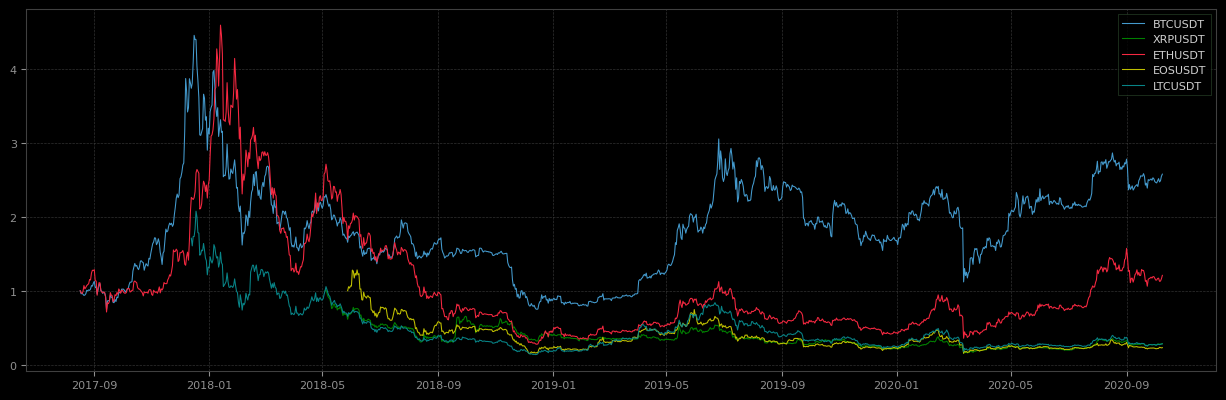

In [618]:
fig(16, 5)
fna = closes.notna().idxmax()
plt.plot(closes / closes.loc[fna.values].bfill().iloc[0]);
plt.legend(closes.columns.values);

Correlation matrix

In [619]:
closes.pct_change().corr()

,BTCUSDT,XRPUSDT,ETHUSDT,EOSUSDT,LTCUSDT
BTCUSDT,1.000000,0.705884,0.759631,0.784873,0.810187
XRPUSDT,0.705884,1.000000,0.813776,0.776004,0.762399
ETHUSDT,0.759631,0.813776,1.000000,0.845306,0.843572
EOSUSDT,0.784873,0.776004,0.845306,1.000000,0.862575
LTCUSDT,0.810187,0.762399,0.843572,0.862575,1.000000
